In [1]:
import pandas as pd
import numpy as np 
import os 
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.Data_Loader import load_data
from src.Data_Cleaner import check_data_quality,clean_data,save_cleaned_data
from src.Eda_Descriptive import *

# Data Loading and Cleaning

In [2]:
path = "../../../Data/data-week1/raw_analyst_ratings.csv"

Main_Companies = ["AAPL", "AMZN", "GOOG", "FB", "MSF", "TSLA", "NVDA"]
filtered_news_df = load_data(path, Main_Companies, date_column="date")
unfiltered_news_df = load_data(path, date_column="date")


In [3]:
# For unfiltered data
quality_report = check_data_quality(unfiltered_news_df)
print("Original data quality:")
print(quality_report)

cleaned_data = clean_data(unfiltered_news_df, remove_duplicates=True, remove_na=True)

# For filtered data
filtered_quality_report = check_data_quality(filtered_news_df)
print("\nFiltered data quality:")
print(filtered_quality_report)

cleaned_filtered_data = clean_data(filtered_news_df, remove_duplicates=True, remove_na=True)

Original data quality:
{'total_rows': 1407328, 'duplicates': np.int64(0), 'missing_values': {'Unnamed: 0': np.int64(0), 'headline': np.int64(0), 'url': np.int64(0), 'publisher': np.int64(0), 'date': np.int64(55987), 'stock': np.int64(0)}, 'data_types': {'Unnamed: 0': 'int64', 'headline': 'object', 'url': 'object', 'publisher': 'object', 'date': 'datetime64[ns]', 'stock': 'object'}, 'unique_values': {'Unnamed: 0': 1407328, 'headline': 845770, 'url': 883429, 'publisher': 1034, 'date': 3946, 'stock': 6204}, 'date_range': {'min_date': Timestamp('2009-02-14 00:00:00'), 'max_date': Timestamp('2020-06-03 00:00:00'), 'null_dates': np.int64(55987)}}
Removed 0 duplicate rows
Removed 55987 rows with missing values
Date range: 2009-02-14 00:00:00 to 2020-06-03 00:00:00
Total rows removed: 55987 (3.98%)

Filtered data quality:
{'total_rows': 7331, 'duplicates': np.int64(0), 'missing_values': {'Unnamed: 0': np.int64(0), 'headline': np.int64(0), 'url': np.int64(0), 'publisher': np.int64(0), 'date': n

### We will save the cleaned data in the /Data directory

In [4]:
save_cleaned_data(cleaned_data, "cleaned_unfiltered_news.csv")
save_cleaned_data(cleaned_filtered_data, "cleaned_filtered_news.csv")

Saved cleaned data to: ../Data/cleaned\cleaned_unfiltered_news.csv
Saved cleaned data to: ../Data/cleaned\cleaned_filtered_news.csv


'../Data/cleaned\\cleaned_filtered_news.csv'

## Headline Length Analysis

`headline_length_stats()` analyzes the distribution of headline lengths by:
- Computing basic statistics (mean, median, etc.)
- Creating a histogram with mean and median markers
- Identifying potential outliers

All Companies - Headline Length Statistics:

Character Length Statistics:
count    1.351341e+06
mean     7.283486e+01
std      3.994437e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.090000e+02
Name: headline, dtype: float64

Word Count Statistics:
count    1.351341e+06
mean     1.137449e+01
std      6.246897e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.000000e+01
Name: headline, dtype: float64


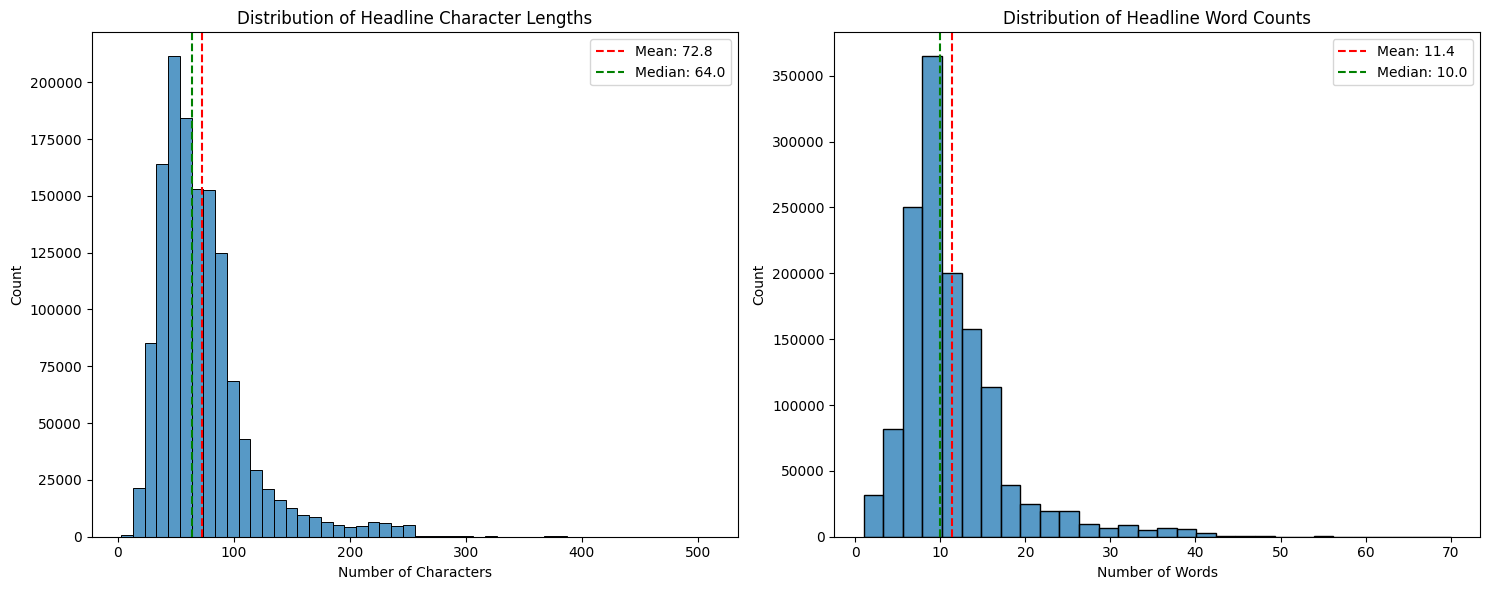

In [10]:
# All companies
print("All Companies - Headline Length Statistics:")
all_stats, all_fig = headline_length_stats(cleaned_data)
print("\nCharacter Length Statistics:")
print(all_stats['characters'])
print("\nWord Count Statistics:")
print(all_stats['words'])
plt.show()  

  


Tech Companies - Headline Length Statistics:

Character Length Statistics:
count    7261.000000
mean       82.410825
std        47.372371
min        16.000000
25%        53.000000
50%        71.000000
75%        90.000000
max       382.000000
Name: headline, dtype: float64

Word Count Statistics:
count    7261.000000
mean       13.013359
std         7.407722
min         2.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        65.000000
Name: headline, dtype: float64


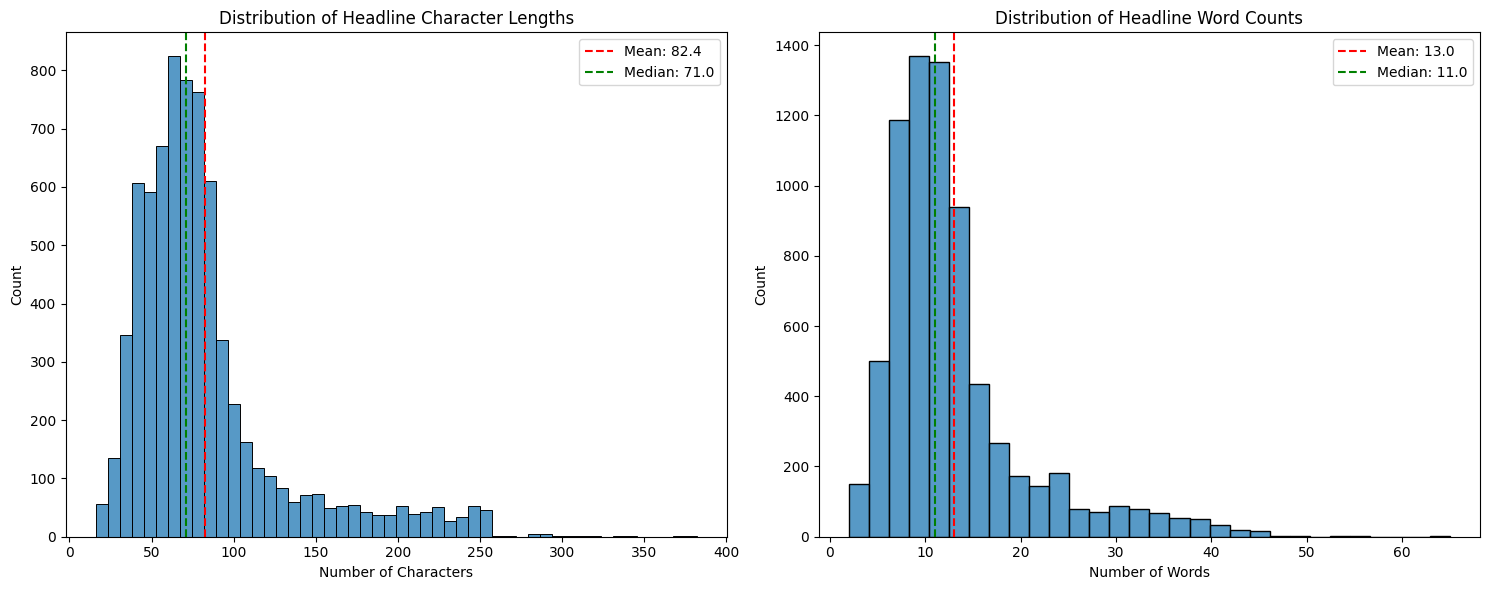

In [11]:
# Tech companies only
print("\nTech Companies - Headline Length Statistics:")
tech_stats, tech_fig = headline_length_stats(cleaned_filtered_data)
print("\nCharacter Length Statistics:")
print(tech_stats['characters'])
print("\nWord Count Statistics:")
print(tech_stats['words'])
plt.show()

## Publisher Analysis

`count_by_publisher()` examines news source distribution by:
- Counting articles per publisher
- Visualizing top publishers
- Showing market concentration

All Companies - Top Publishers:
publisher
Paul Quintaro        224161
Lisa Levin           174571
Benzinga Newsdesk    135734
Charles Gross         94942
Monica Gerson         81769
Eddie Staley          56251
Hal Lindon            47577
Juan Lopez            28399
Benzinga Staff        28108
ETF Professor         24127
Name: count, dtype: int64


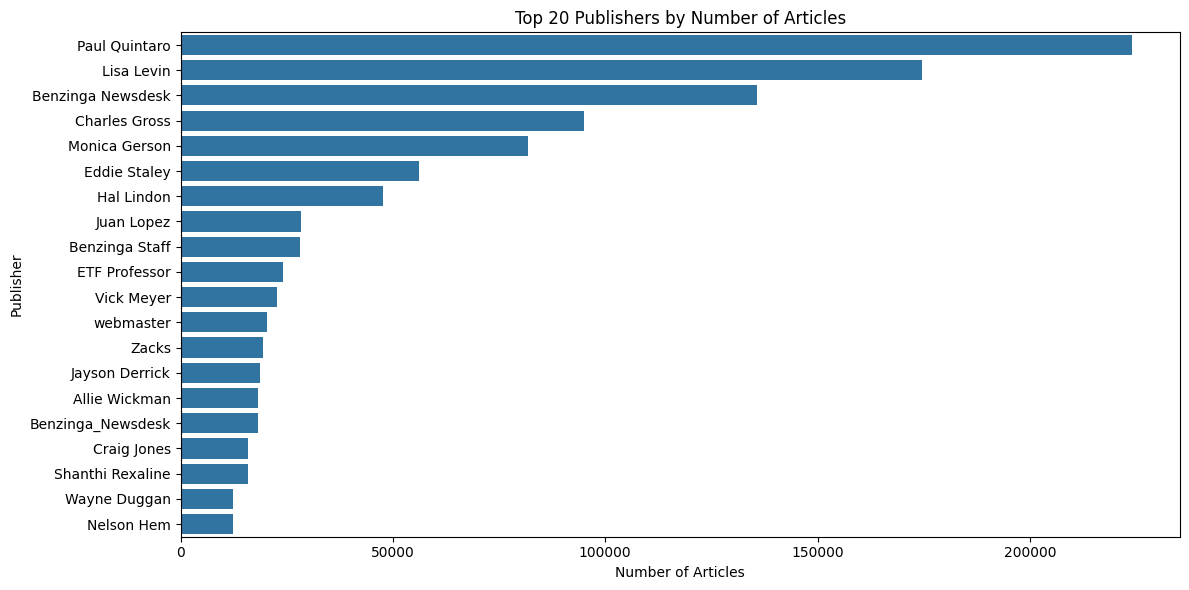


Tech Companies - Top Publishers:
publisher
Benzinga Newsdesk    1664
Lisa Levin            649
Charles Gross         459
Benzinga_Newsdesk     310
Wayne Duggan          298
JJ Kinahan            295
Paul Quintaro         293
Neer Varshney         271
Jayson Derrick        236
Shanthi Rexaline      189
Name: count, dtype: int64


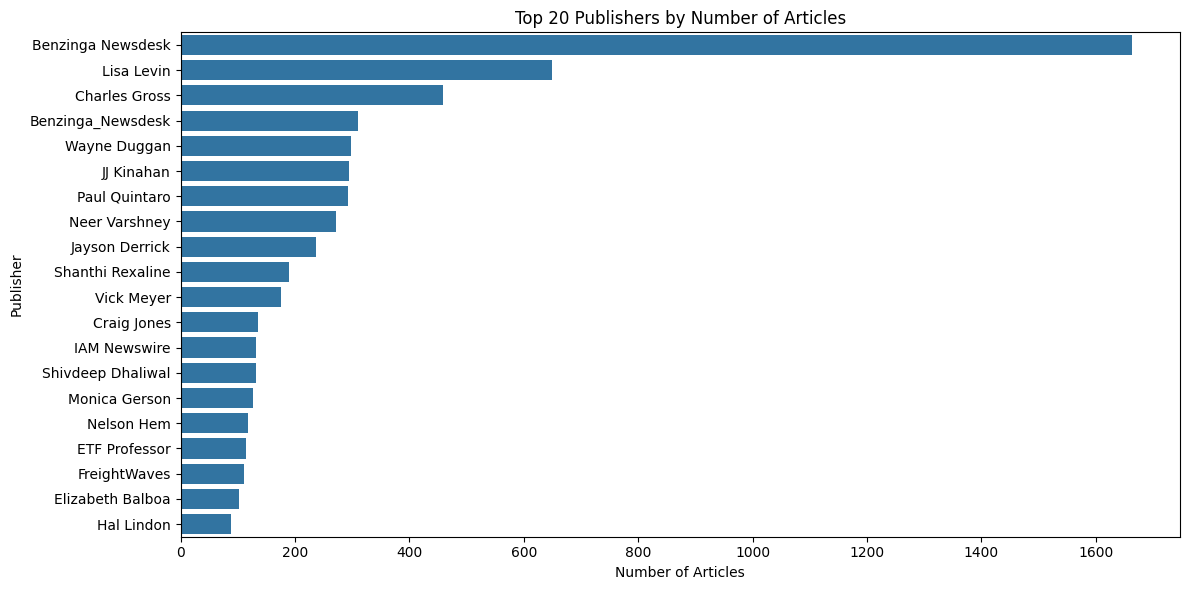

In [ ]:
# All companies
print("All Companies - Top Publishers:")
all_pub_counts, all_pub_fig = count_by_publisher(cleaned_data)
print(all_pub_counts.head(10))
plt.show()  
# Tech companies only
print("\nTech Companies - Top Publishers:")
tech_pub_counts, tech_pub_fig = count_by_publisher(cleaned_filtered_data)
print(tech_pub_counts.head(10))
plt.show()  

## Time Series Analysis

`time_series_counts()` analyzes temporal patterns by:
- Plotting daily article counts
- Computing 7-day rolling averages
- Identifying trends and seasonality

All Companies - Time Series Analysis:
count    4128.000000
mean      327.359738
std       267.681093
min         0.000000
25%        26.000000
50%       378.000000
75%       529.000000
max      1766.000000
dtype: float64


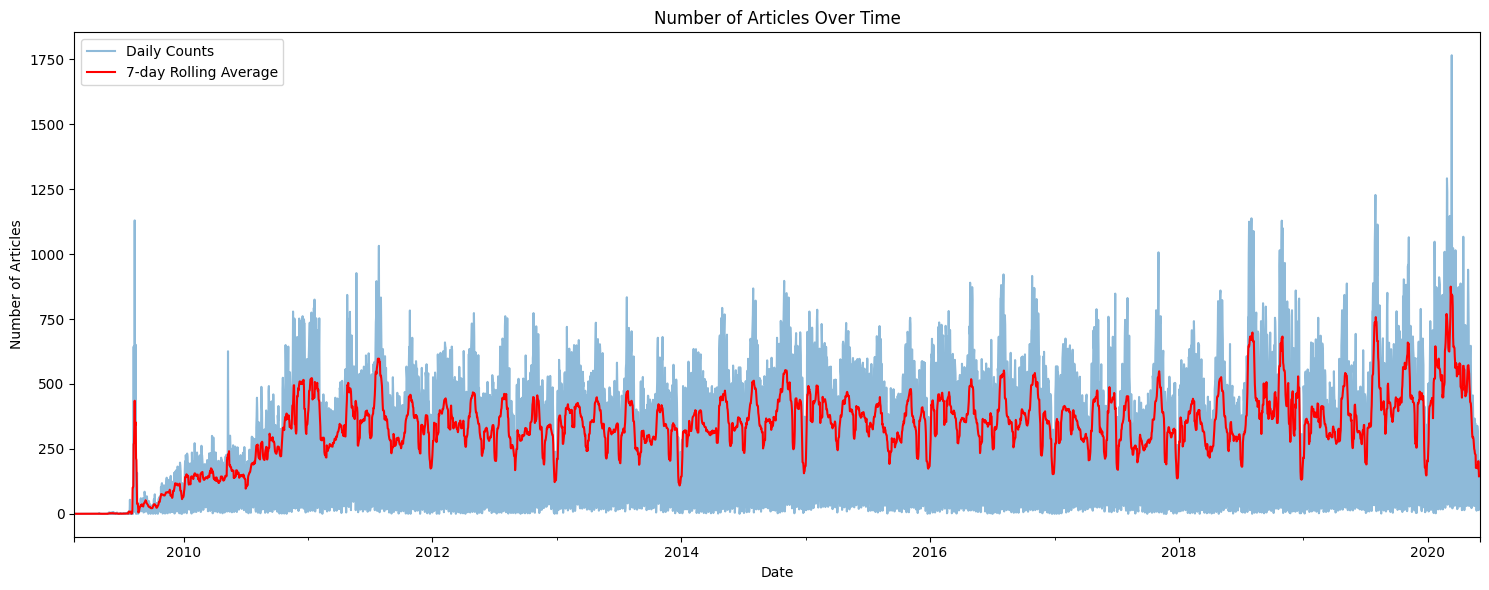


Tech Companies - Time Series Analysis:
count    3711.000000
mean        1.956615
std         5.931460
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       127.000000
dtype: float64


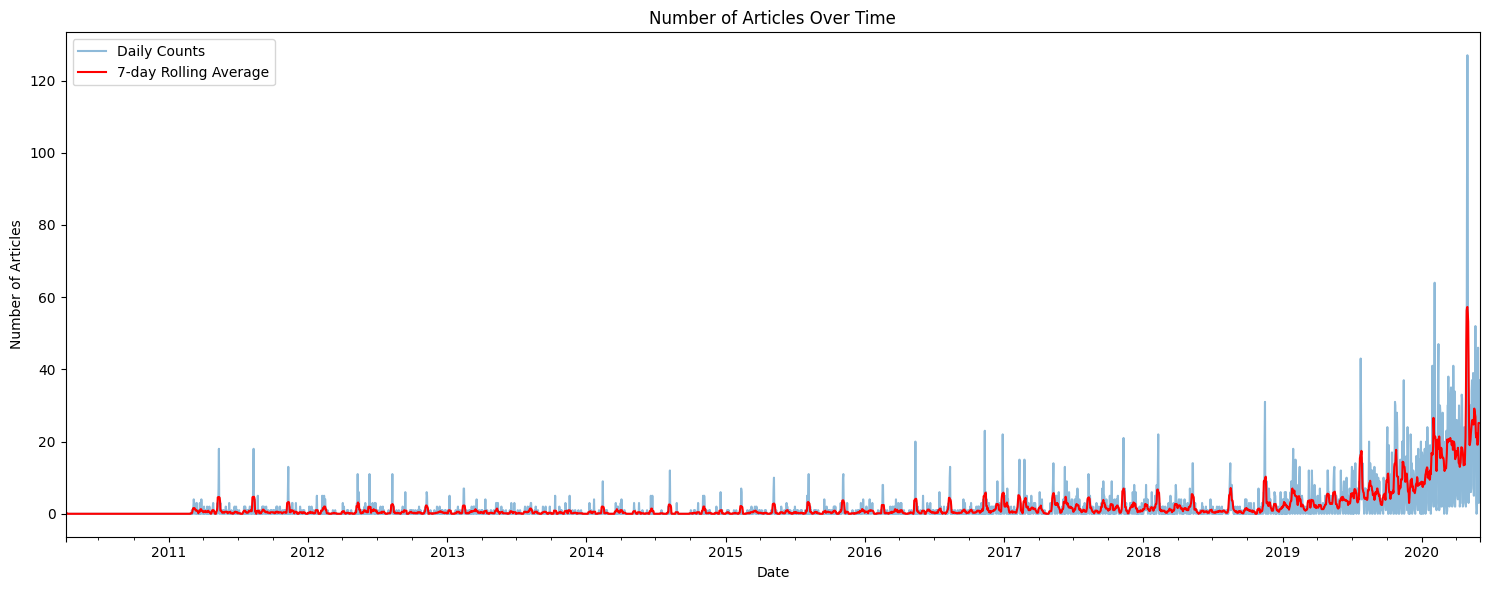

In [14]:
# All companies
print("All Companies - Time Series Analysis:")
all_ts, all_ts_fig = time_series_counts(cleaned_data)
print(all_ts.describe())
plt.show()

# Tech companies only
print("\nTech Companies - Time Series Analysis:")
tech_ts, tech_ts_fig = time_series_counts(cleaned_filtered_data)
print(tech_ts.describe())
plt.show()

# News Headlines Exploratory Data Analysis

Analyzing three key aspects of our news dataset:
1. Basic statistics of headlines and publishers
2. Publication timing patterns
3. Publisher distribution and characteristics

In [16]:
# 1. Basic Statistics
# Headline lengths
cleaned_filtered_data['headline_length'] = cleaned_filtered_data['headline'].str.len()
stats = cleaned_filtered_data['headline_length'].describe()
print("Headline Statistics:\n", stats)

# Top publishers
top_publishers = cleaned_filtered_data['publisher'].value_counts().head(10)
print("\nTop 10 Publishers:\n", top_publishers)

Headline Statistics:
 count    7261.000000
mean       82.410825
std        47.372371
min        16.000000
25%        53.000000
50%        71.000000
75%        90.000000
max       382.000000
Name: headline_length, dtype: float64

Top 10 Publishers:
 publisher
Benzinga Newsdesk    1664
Lisa Levin            649
Charles Gross         459
Benzinga_Newsdesk     310
Wayne Duggan          298
JJ Kinahan            295
Paul Quintaro         293
Neer Varshney         271
Jayson Derrick        236
Shanthi Rexaline      189
Name: count, dtype: int64


## Time Series Analysis
Examining when news is published to identify patterns and peak periods.

In [17]:
# 2. Time Series Patterns
cleaned_filtered_data['date'] = pd.to_datetime(cleaned_filtered_data['date'])
cleaned_filtered_data['hour'] = cleaned_filtered_data['date'].dt.hour
cleaned_filtered_data['day_of_week'] = cleaned_filtered_data['date'].dt.day_name()

# Publication patterns
day_counts = cleaned_filtered_data['day_of_week'].value_counts()
hour_counts = cleaned_filtered_data['hour'].value_counts().sort_index()
daily_volume = cleaned_filtered_data.groupby('date').size().sort_values(ascending=False).head(5)

print("Articles by Day:", day_counts)
print("\nArticles by Hour:", hour_counts)
print("\nBusiest Days:", daily_volume)

Articles by Day: day_of_week
Thursday     1598
Friday       1418
Wednesday    1374
Tuesday      1359
Monday       1281
Saturday      117
Sunday        114
Name: count, dtype: int64

Articles by Hour: hour
0    7261
Name: count, dtype: int64

Busiest Days: date
2020-04-30    127
2020-04-29     94
2020-05-01     86
2020-02-04     64
2020-05-21     52
dtype: int64


## Publisher Analysis
Understanding publisher characteristics and distribution.

In [18]:
# 3. Publisher Analysis
# Identify email publishers
cleaned_filtered_data['is_email'] = cleaned_filtered_data['publisher'].str.contains('@', na=False)
publisher_types = cleaned_filtered_data['is_email'].value_counts()

# Extract email domains if present
if cleaned_filtered_data['is_email'].any():
    domains = (cleaned_filtered_data[cleaned_filtered_data['is_email']]['publisher']
              .str.split('@').str[1].value_counts().head())
    
print("Publisher Types:\n", publisher_types)
print("\nTop Email Domains:\n", domains if cleaned_filtered_data['is_email'].any() else "No email publishers")

Publisher Types:
 is_email
False    7205
True       56
Name: count, dtype: int64

Top Email Domains:
 publisher
benzinga.com    55
gmail.com        1
Name: count, dtype: int64
